In [38]:
import pandas as pd
import random
import matplotlib.pyplot as plt

In [39]:
pd.options.display.max_rows = 11
df = pd.read_csv("rte.standardized.tsv", delimiter="\t", quotechar='"')
#rd = rd.iloc[1: , :]
df = df.drop('!amt_annotation_ids', axis=1)
#print(df)

In [50]:
def getWithSetK(df, k):
    tasks = df.groupby('orig_id')
    correct = 0
    total = 800

    for groupName in tasks.groups.keys():
        lables = set([0,1,2,3,4,5,6,7,8,9])
        pick = random.sample([*lables], k=k)
        #print(pick)
        response = tasks.get_group(groupName)['response']
        valid = tasks.get_group(groupName)['gold']
        #print(groupName,":")
        #print(response.iloc[0])
        count_1 = 0
        count_0 = 0
        for lable in pick:
            #print(response.iloc[lable], "--", valid.iloc[lable])
            if response.iloc[lable] == 1:
                count_1 += 1
            else:
                count_0 += 1
        if count_1 > count_0 and valid.iloc[lable] == 1:
            correct += 1
        elif count_1 < count_0 and valid.iloc[lable] == 0:
            correct += 1
        elif count_1 == count_0:
            correct += random.randint(0, 1)
    print(correct, "--", total)
    return float(total - correct)/total

In [72]:
dic = {1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0}
for t in range(1, 11):
    for i in range(1, 11):
        dic[i] += getWithSetK(df, i)
for i in range(1, 11):
    dic[i] = dic[i]/float(10)
print(dic)

566 -- 800
581 -- 800
642 -- 800
644 -- 800
680 -- 800
677 -- 800
705 -- 800
697 -- 800
708 -- 800
719 -- 800
585 -- 800
568 -- 800
636 -- 800
652 -- 800
683 -- 800
693 -- 800
690 -- 800
704 -- 800
718 -- 800
722 -- 800
587 -- 800
587 -- 800
645 -- 800
654 -- 800
693 -- 800
684 -- 800
687 -- 800
706 -- 800
718 -- 800
716 -- 800
590 -- 800
597 -- 800
657 -- 800
662 -- 800
698 -- 800
677 -- 800
704 -- 800
707 -- 800
720 -- 800
717 -- 800
579 -- 800
595 -- 800
659 -- 800
640 -- 800
671 -- 800
684 -- 800
694 -- 800
703 -- 800
715 -- 800
717 -- 800
575 -- 800
567 -- 800
649 -- 800
644 -- 800
679 -- 800
679 -- 800
704 -- 800
696 -- 800
723 -- 800
713 -- 800
602 -- 800
588 -- 800
641 -- 800
631 -- 800
684 -- 800
677 -- 800
700 -- 800
698 -- 800
719 -- 800
715 -- 800
579 -- 800
576 -- 800
652 -- 800
653 -- 800
684 -- 800
681 -- 800
703 -- 800
697 -- 800
719 -- 800
713 -- 800
586 -- 800
572 -- 800
657 -- 800
653 -- 800
654 -- 800
688 -- 800
696 -- 800
703 -- 800
717 -- 800
711 -- 800
588 -- 800

{1: 0.27037500000000003, 2: 0.27312499999999995, 3: 0.19, 4: 0.19037500000000002, 5: 0.14962500000000004, 6: 0.14724999999999996, 7: 0.12699999999999997, 8: 0.12450000000000001, 9: 0.10300000000000002, 10: 0.10487499999999998}


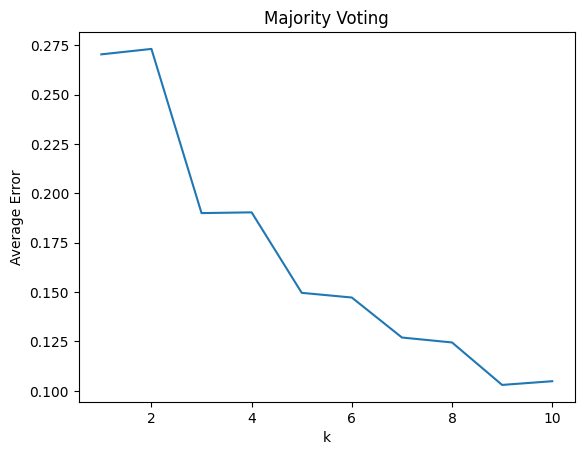

In [73]:
print(dic)
plt.plot(dic.keys(), dic.values())
plt.ylabel('Average Error')
plt.xlabel('k')
plt.title('Majority Voting')
plt.show()